# Neural Networks I

## Introduction

- Our focus has so far been on linear classifiers. Now, our focus will shift to **non-linear classifiers**.
- We will start with learning about neural networks.
- However, a lot of real-world data is not separable with a straight line.
- Example:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two non-linearly separable classes (e.g., circles)
np.random.seed(0)
n_samples = 200

# Inner circle
r_inner = 1
theta_inner = 2 * np.pi * np.random.rand(n_samples // 2)
x_inner = r_inner * np.cos(theta_inner) + 0.2 * np.random.randn(n_samples // 2)
y_inner = r_inner * np.sin(theta_inner) + 0.2 * np.random.randn(n_samples // 2)

# Outer circle
r_outer = 2.5
theta_outer = 2 * np.pi * np.random.rand(n_samples // 2)
x_outer = r_outer * np.cos(theta_outer) + 0.2 * np.random.randn(n_samples // 2)
y_outer = r_outer * np.sin(theta_outer) + 0.2 * np.random.randn(n_samples // 2)

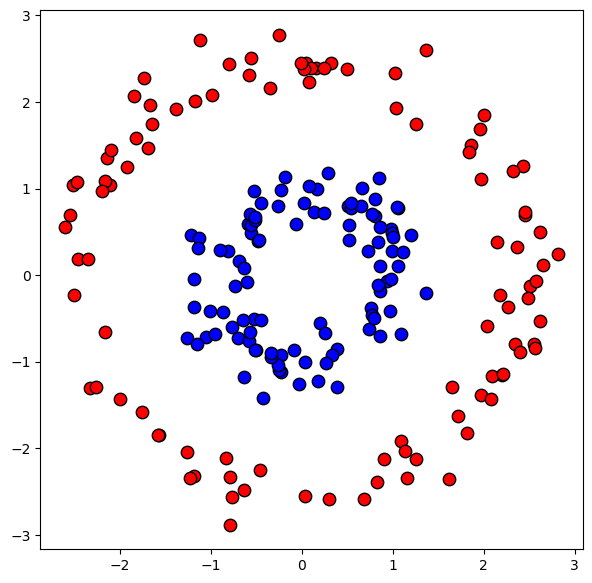

In [3]:
plt.figure(figsize=(7, 7))
plt.scatter(x_inner, y_inner, color='blue', edgecolor='k', s=80, label='Class 1')
plt.scatter(x_outer, y_outer, color='red', edgecolor='k', s=80, label='Class 2')
plt.show()

## Neural networks

- McCulloch - Pitts neuron (1946).
- The Perceptron (Rosenblatt, 1950's).
- The XOR problem (Minsky and Papert, 1969) - the first AI winter.
- (Debated topic) Backpropagation (Rumelhart, Hinton, Williams, 1986) - a new hope.
- Lacked data and compute, difficult to train - the second AI winter.
- AlexNet (Krizhevsky, Sutskever, Hinton, 2013) - the deep learning revolution.


<p float="left">
    <img src="media/mcpitts.png" width="150" />
    <img src="media/rosenblatt.jpg" width="150" />
    <img src="media/mnp.png" width="150" />
    <img src="media/alexnet.jpeg" width="150" />
</p>


### The XOR problem (Minsky and Papert, 1969)

- The Perceptron cause a lot of excitement.
- Researchers started pushing the limit of the Perceptron.
- Problem:
    - The Perceptron cannot solve the XOR problem!

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# XOR problem: four blobs at (0,0), (0,1), (1,0), (1,1)
np.random.seed(42)
n_samples = 50
std = 0.15

centers = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
labels = np.array([0, 1, 1, 0])  # XOR labels

X = []
y = []
for center, label in zip(centers, labels):
    X.append(center + std * np.random.randn(n_samples, 2))
    y.append(np.full(n_samples, label))
X = np.vstack(X)
y = np.concatenate(y)


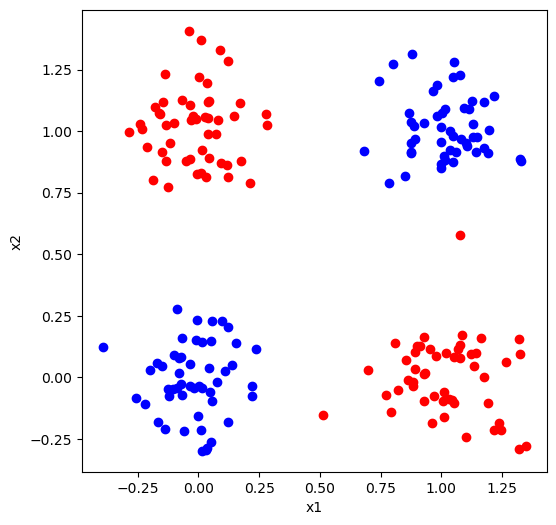

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Transforming into a linearly separable representation

- The perceptron requires linearly separable data.
- What if we could transform the data to accomplis this?

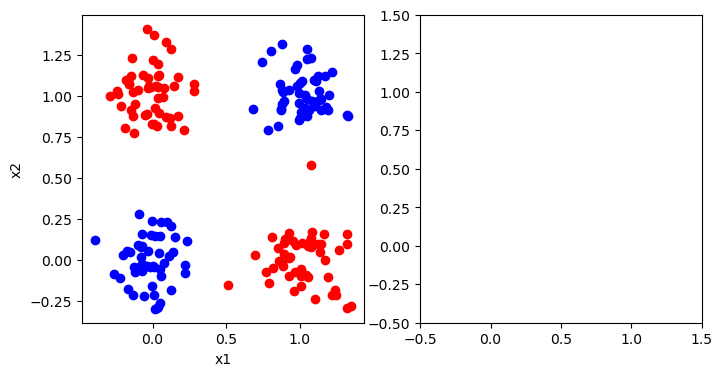

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.subplot(122)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### The big idea

- Transform into a new representation where data is linearly separable.
- Transformation is done by another Perceptron!
- Stack layers of Perceptron to form a **Multilayer Perceptron** (MLP).

### A two-layer Perceptron (2LP)


### Classification capabilites of 2LP

- A hidden layer maps $\mathbf{x}\in \mathcal{R}^d$ onto vertices of a p-dimensional cube (hidden layer with p neurons).
- A 2LP can separate classes represented as union of polyhedral regions.
- Not all regions can be separated!
    - More layers increases the capactiy of the network.
    - But how to train?

## The Backpropagation algorithm

- An efficient tranining algrotihm for MLPs
- A string of important papers:
    - blabla
    - blabla

### The Backpropagation algorithm


<p float="left">
    <img src="media/mlp.jpg" width="700" />
</p>

### The Backpropagation algorithm - loss and optimization

- Let $$J = \sum_{i=1}^N \Epsilon (i),$$
- where $$\Epsilon (i)=\sum_{m=1}^\frac{1}{2}e_m(i)^2$$
- Want: $$ \underset{\mathbf{w}}{\operatorname{min}}\ J(\mathbf{w})$$

### The Backpropagation algorithm - gradients of the output layer

- $$\frac{\partial}{\partial \mathbf{w}_j^L} \Epsilon (i) = \frac{\partial}{\partial \mathbf{w}_j^L} v_j^L (i) \frac{\partial}{\partial v_j^L (i) }\Epsilon (i)$$

### The Backpropagation algorithm - gradients of the output layer

- $$ \frac{\partial}{\partial \mathbf{w}_j^L} \Epsilon (i) = \frac{\partial}{\partial \mathbf{w}_j^L} v_j^L (i) \frac{\partial}{\partial v_j^L (i) }\Epsilon (i)$$
- $$ \frac{\partial}{\partial \mathbf{w}_j^L} v_j^L (i) = $$
- $$ \frac{\partial}{\partial v_j^L (i) }\Epsilon (i) = $$

### Gradient descent reminder

- Reminder: $$ \mathbf{w}_j^L (t+1) = \mathbf{w}_j^L (t) - \gamma \frac{\partial}{\partial  \mathbf{w}_j^L} J$$

### The Backpropagation algorithm - gradients of the hidden layers

- For layer $L-1$ and neuron $j$: $$\frac{\partial}{\partial \mathbf{w}_j^{L-1}} \Epsilon (i) = \frac{\partial}{\partial \mathbf{w}_j^{L-1}} v_j^{L-1} (i) \frac{\partial}{\partial v_j^{L-1} (i) }\Epsilon (i).$$
- $v_j^{L-1}$ not present in $\Epsilon (i)$, comes through $v_j^{L}$

### Gradients of the hidden layers - chain rule

- $$\frac{\partial}{\partial v_j^{L-1} (i) }\Epsilon (i) = \delta_j^{L-1}(i) = $$

---

- $$\frac{\partial v_j^{L} (i)}{\partial v_j^{L-1} (i) } = $$

---

- $$ \delta_j^{L-1}(i) = $$

---

- Error at output $(L)$ propagated to $(L-1)$ to compute gradients of weights.
- Repeat to compute gradients for the enitre network!

### Backpropagation recipe

- Initialize parameters and "freeze" them.
- The forward pass: compute all 
- Backward pass: compute
- Update all parameters
- Repeat!

### Top tips for implementing and understanding backpropagation

- Keep it simple in the begining!
- Start with a fixed architecture.
    - Do not have the same number of neurons in a layer.
- Do all calculations by hand before you start programming.
- When you start programming, cross reference your implementation with your hand-calculations.
- There is only one loop, the outer loop of the number of epochs.
    - Matrix multiplication!

<p float="left">
    <img src="media/mlp.jpg" width="500" />
</p>

## Programming exercises

Below are programming exercises assocaited with this lecture. These cell blocks are starting points that loads the data and prepares the problem such that you can get going with the implementation. There are also theoretical exercsies, but due to copyright we cannot shared them here. They will be made available in a private repository connected to the course.


## Solving the XOR problem with a 2LP

In this problem, you will solve the XOR problem using a 2LP. Experiment with the number of neurons in the hidden layer and the learning rate in your gradient descent algorithm.

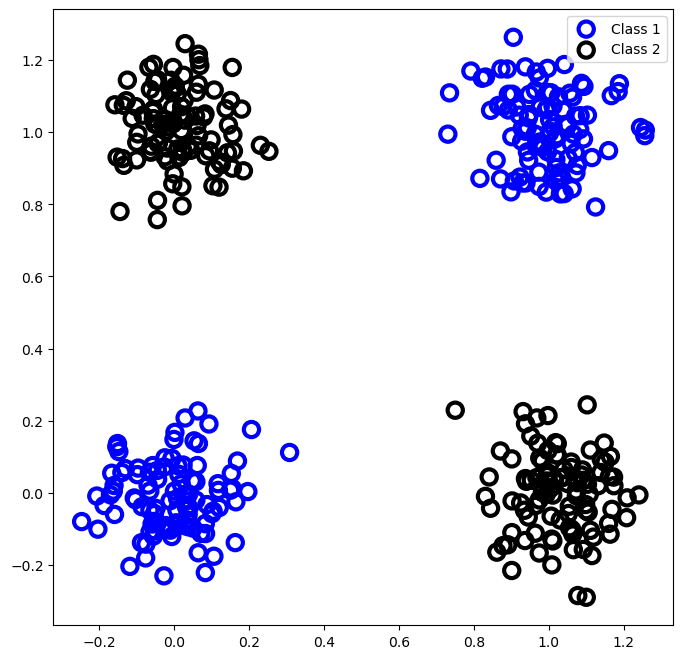

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt


N_tr = 100
mu1 = np.array([0.0, 0.0])
mu2 = np.array([1.0, 1.0])
mu3 = np.array([0.0, 1.0])
mu4 = np.array([1.0, .0])
sigma = np.array([[0.01, 0.0], [0.0, 0.01]])

x1_tr = np.random.multivariate_normal(mu1, sigma, N_tr)
x2_tr = np.random.multivariate_normal(mu2, sigma, N_tr)
x3_tr = np.random.multivariate_normal(mu3, sigma, N_tr)
x4_tr = np.random.multivariate_normal(mu4, sigma, N_tr)

x = np.concatenate((x1_tr, x2_tr, x3_tr, x4_tr))
y = np.concatenate((np.zeros(N_tr), np.zeros(N_tr),
                    np.ones(N_tr), np.ones(N_tr)))

shuffle_idx = random.sample(range(0, 4 * N_tr), 4 * N_tr)

"""
X = 400 x 3
"""
x = np.c_[x[shuffle_idx], np.ones(x.shape[0])]
y = y[shuffle_idx]

plt.figure(1, figsize=(8, 8))
plt.scatter(x1_tr[:, 0], x1_tr[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 1')
plt.scatter(x2_tr[:, 0], x2_tr[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0)
plt.scatter(x3_tr[:, 0], x3_tr[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 2')
plt.scatter(x4_tr[:, 0], x4_tr[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0)
plt.legend()
plt.show()

## Non-linear classification

The code below loads a classic synthetic machine learning dataset, the Two Moons dataset. This is a binary classification problem that is not solvable with a linear classifier (try one of your classifiers from previous notebooks and see for yourself.) Design and train a MLP to solve the task. You can experiment with making the problem more or less challenging by changing the "noise" parameter in the "make_moons" function.

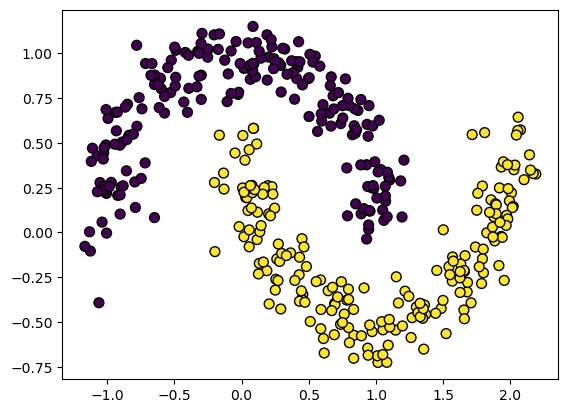

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400, noise=0.11, random_state=42)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.show()